# Image Resizing

In [1]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from torchvision.utils import draw_bounding_boxes
from torchvision.io import read_image

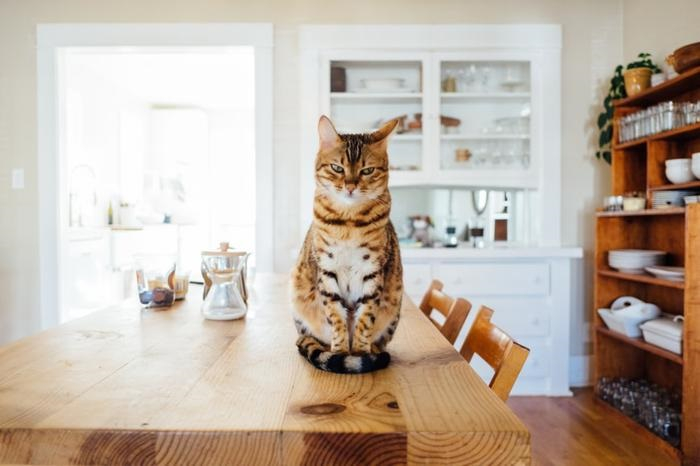

(466, 700, 3)

In [4]:
import cv2
import numpy as np

img = cv2.imread('/content/cat.jpg')
cv2_imshow(img)
img.shape

## Nearest Neighbour Interpolation

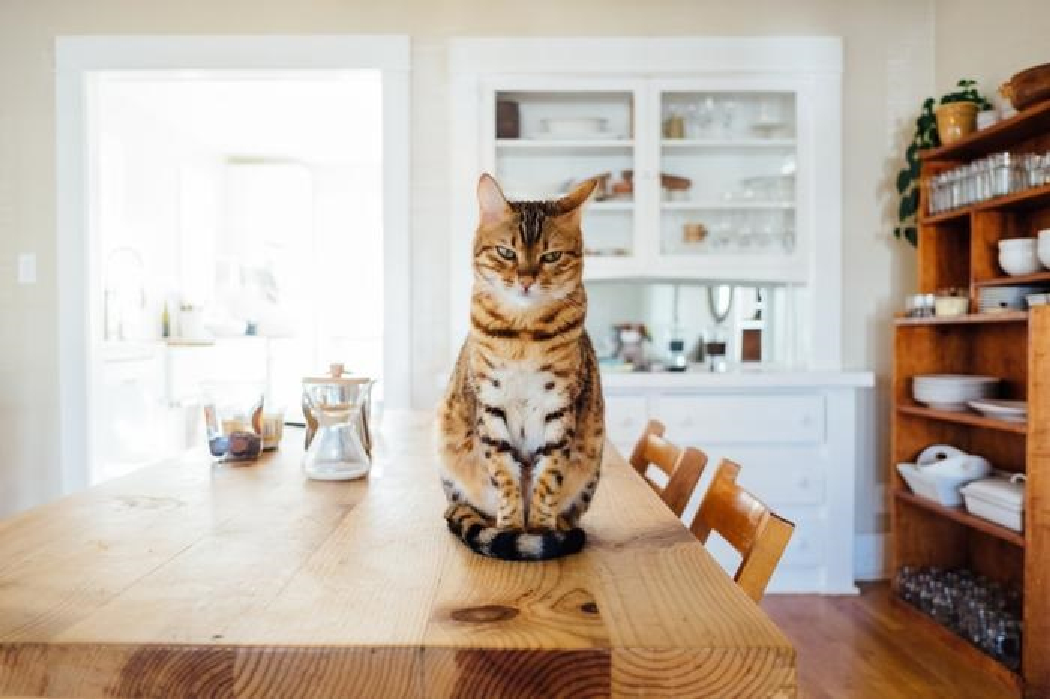

In [6]:
near_img = cv2.resize(img,None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_NEAREST)
cv2_imshow(near_img)

## Bilinear Interpolation

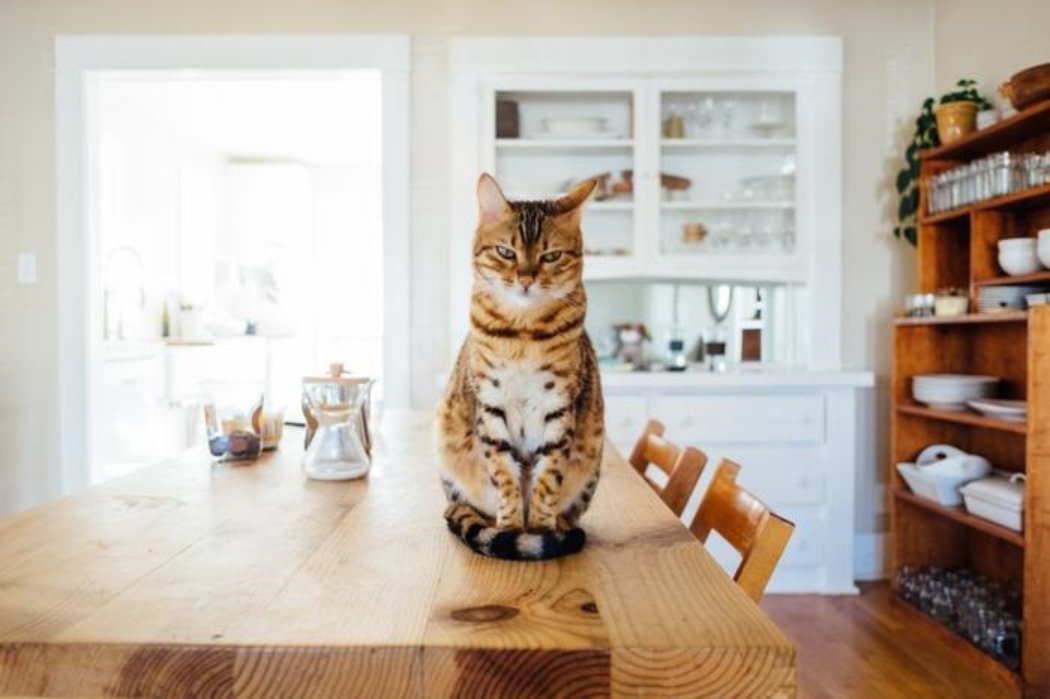

In [7]:
bilinear_img = cv2.resize(img,None, fx = 1.5, fy = 1.5, interpolation = cv2.INTER_LINEAR)
cv2_imshow(bilinear_img)

## Bicubic Interpolation

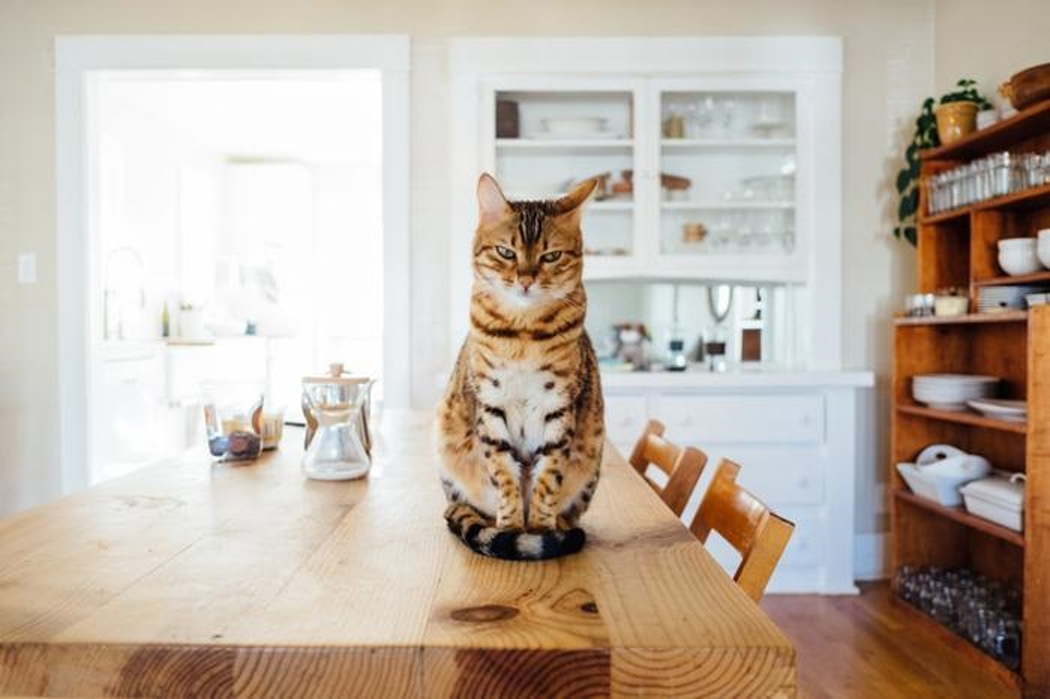

In [8]:
#bicubic
bicubic_img = cv2.resize(img,None, fx =1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(bicubic_img)

# Checking bbox coordinates :

Here we will scale the cat image with bounding box to 1.5 and compare it with the scaled cat image on which bounding box is drawn. We will be using bicubic interpolation for this task

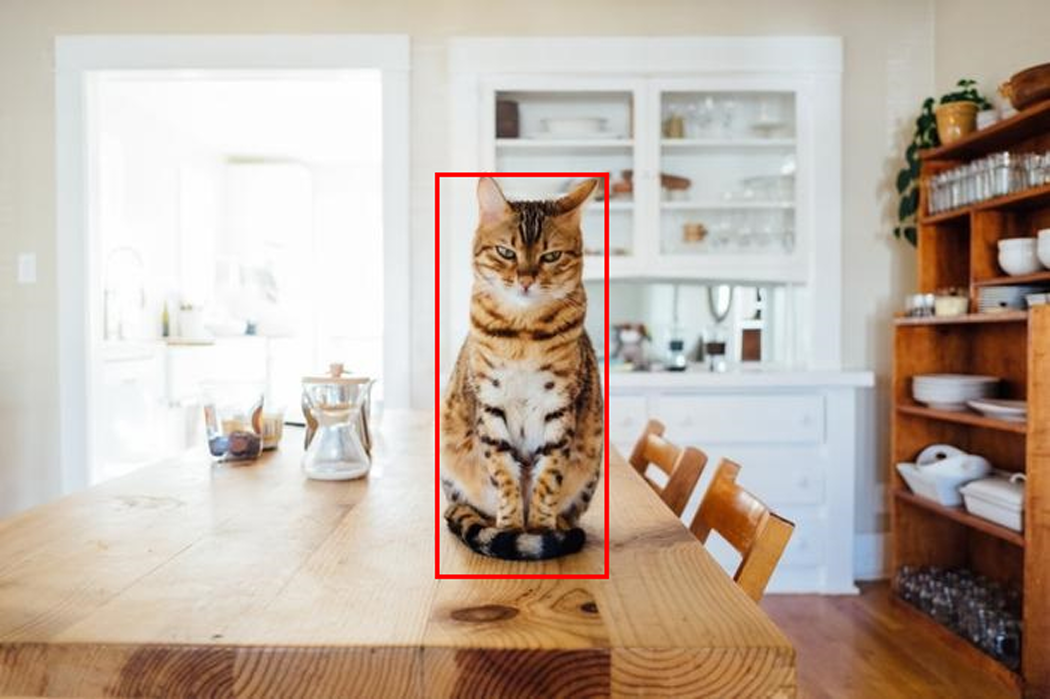

In [9]:
# Scale cat image with bbox to 1.5

img_1 = cv2.imread('/content/bbox_cat.png')
res_img_1 = cv2.resize(img_1,None, fx =1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
cv2_imshow(res_img_1)

Drawing bbox on the scaled cat image whose scaling factor is 1.5. We already know the bbox coordinates of original cat image. We will read the image using torchvision to avoid errors while displaying the image.

tensor([435.0000, 172.5000, 607.5000, 577.5000])
torch.Size([4])
torch.Size([1, 4])


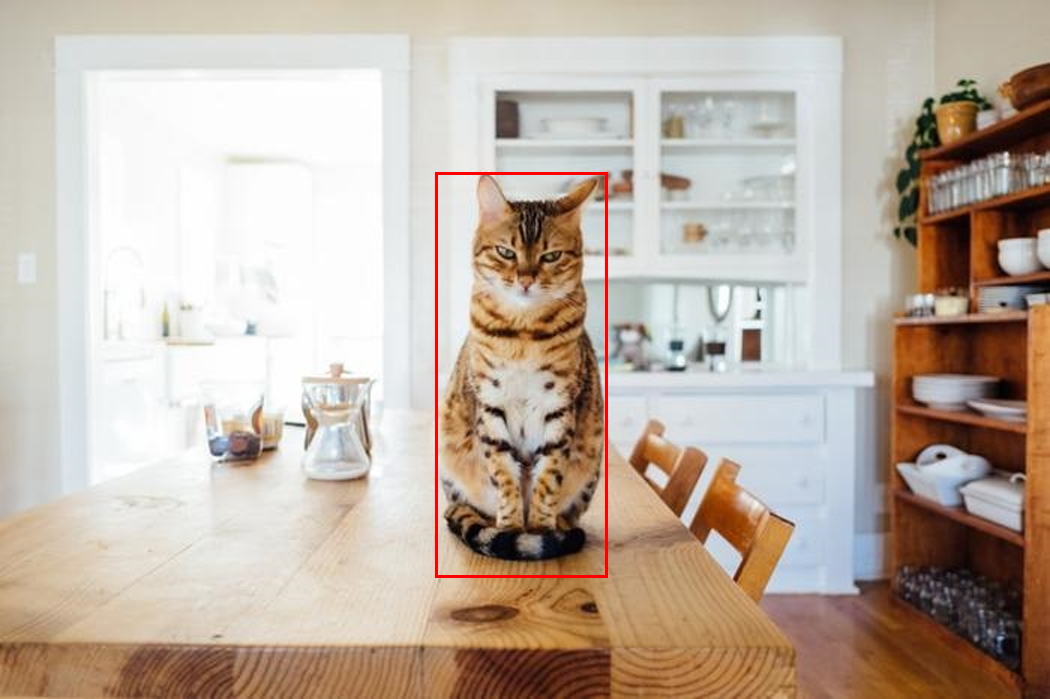

In [21]:
bbox_cord = [290,115,405,385]
new_bbox_cord = list(1.5*np.asarray(bbox_cord))
new_bbox_cord=torch.tensor(new_bbox_cord,dtype=torch.float)
print(new_bbox_cord)
print(new_bbox_cord.size())
new_bbox_cord = new_bbox_cord.unsqueeze(0)
print(new_bbox_cord.size())

bicubic_cat_img = cv2.resize(img,None, fx =1.5, fy = 1.5, interpolation = cv2.INTER_CUBIC)
bicubic_cat_img = cv2.imwrite('resize.png',bicubic_cat_img)

resize_img = read_image('/content/resize.png')
sc_img_bbox = draw_bounding_boxes(resize_img,new_bbox_cord,width=3,colors = (255,0,0))
sc_img_bbox = torchvision.transforms.ToPILImage()(sc_img_bbox)
sc_img_bbox

### Both look same except the fact that thickness of bbox in the scale bbox_cat_image is greater when compared to that of later one. This is because when we scale an image the entire contents in the image also gets scaled including the bbox.